### <font color='#556b2f'> CS6301.010: Machine Learning for Engineers and Scientists (Spring '19) </font>
_**Instructor**: Gautam Kunapuli_ <br>
_**Due**: In class, **March 6 (Wednesday)**_

---

# **_Homework 3_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#556b2f'>Wednesday, March 6, 2019</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#556b2f'>9:59am Central Standard Time, Wednesday, March 6, 2019</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**. 

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade. 

---

# 1. <font color='#556b2f'> **Decision Trees with Synthetic Data**</font>, 25 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the generalization behavior of decision trees of increasing complexity, characterized by their depth, $d$.

In [141]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
    # Generate a non-linear data set
    X, y = make_circles(n_samples=n_samples, noise=0.25, random_state=42, factor=0.3)

    # Take a small subset of the data and make it VERY noisy; that is, generate outliers
    m = 30
    np.random.seed(30)  # Deliberately use a different seed
    ind = np.random.permutation(n_samples)[:m]
    X[ind, :] += np.random.multivariate_normal([0, 0], 0.25*np.eye(2), (m, ))
    y[ind] = 1 - y[ind]

    # Plot this data
    cmap = ListedColormap(['#b30065', '#178000'])  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       

    # First, we use train_test_split to partition (X, y) into training and test sets
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)

    # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)

    return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [142]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#
def visualize(models, X, y):
    # Initialize plotting
    if len(models) % 3 == 0:
        nrows = len(models) // 3
    else:
        nrows = len(models) // 3 + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
    cmap = ListedColormap(['#b30065', '#178000'])

    # Create a mesh
    xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
    yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                               np.arange(yMin, yMax, 0.01))

    for i, (p, clf) in enumerate(models.items()):
        r, c = np.divmod(i, 3)
        if nrows == 1:
            ax = axes[c]
        else:
            ax = axes[r, c]

        # Plot contours
        zMesh = clf.predict(np.c_[xMesh.ravel(), yMesh.ravel()])
        zMesh = zMesh.reshape(xMesh.shape)
        ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

        # Plot data
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
        ax.set_title('Tree Depth = {0}'.format(p))

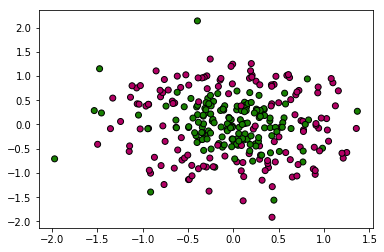

In [143]:
# Generate the data
n_samples = 300    # Total size of data set
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. Model Selection and Visualization (20 points)
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns decision trees. Use scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function to learn decision trees of different depths, $d \in \{1, \, \cdots, \, 9 \}$. 

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly. Visualize the decision trees of different depths using the provided function.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $d_{best}$. Report the accuracy on the **test set** for this selected best decision tree model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $d_{best}$_.


 The values of d for which lowest validation error of 0.125  was recoded, is d =  5 and the corresponding model has accuracy 80.0 %


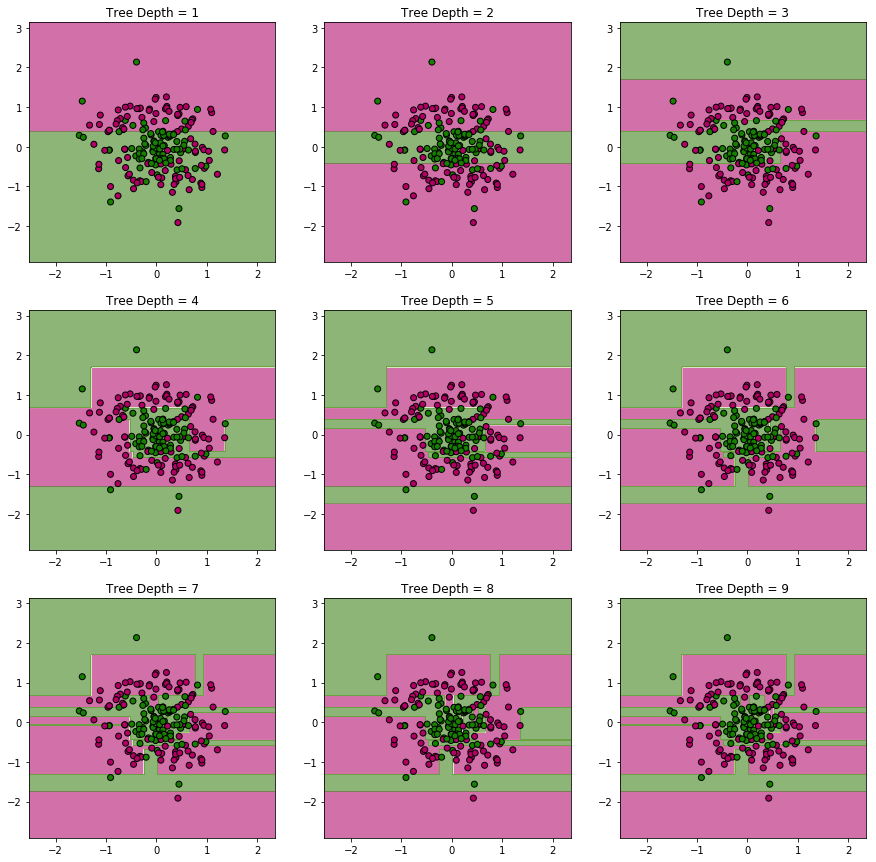

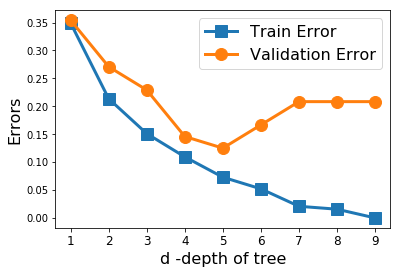

In [144]:
# Learn decision trees with different depths
from sklearn.tree import DecisionTreeClassifier

d_values = np.arange(1, 10, dtype='int')
DT_models = dict()
DT_trnErr = dict()
DT_valErr = dict()

for d in d_values:
    DT_models[d] = DecisionTreeClassifier(max_depth=d)
    DT_models[d].fit(X_trn,y_trn)
    DT_trnErr[d] = 1 - DT_models[d].score(X_trn,y_trn)
    DT_valErr[d] = 1 - DT_models[d].score(X_val,y_val)
    #print('Learning a decision tree with d = {0}.'.format(d),DT_valErr[d])
    
visualize(DT_models, X_trn, y_trn)
plt.figure()
plt.plot(DT_trnErr.keys(), DT_trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(DT_valErr.keys(), DT_valErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('d -depth of tree', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.xticks(list(DT_valErr.keys()), fontsize=12)
plt.legend([ 'Train Error','Validation Error'], fontsize=16)

DT_minvalerr = min(DT_valErr.values())
for d in d_values:
    if DT_valErr[d]== DT_minvalerr:
        d_best = d
print('\n','The values of d for which lowest validation error of',DT_minvalerr,' was recoded, is d = ',d_best,'and the corresponding model has accuracy',100*DT_models[d_best].score(X_tst,y_tst),'%')

---
### **b**. Discussion (5 points) 
How do the training error and the validation error change with $d$? Based on the visualization of the models and their resulting classifiers, how does changing $d$ change the models? Explain in terms of complexity and fit.

---
# 2. <font color='#556b2f'> **Evaluating Moves for Tic-Tac-Toe with Decision Trees**</font>, 35 points. 

For this problem, we will use the [Tic-Tac-Toe](https://www.google.com/search?q=tic+tac+toe) [Endgame](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) data set, which has already been pre-processed and partitioned into training and test sets. The data set contains the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row"). Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

The first column in the train and test files is the label ($1=$ win for x and $0=$ loss for x). The next 9 columns are the features ($0=$ blank, $1=$'o', $2=$'x') describing the game board state, **row-wise**.

In [145]:
# Load the data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
# Load the training data
M = np.loadtxt('./tictactoe_trn.csv', delimiter=',', dtype=int)
y_trn = M[:, 0]
X_trn = M[:, 1:]
# Load the test data
M = np.loadtxt('./tictactoe_tst.csv', delimiter=',', dtype=int)
y_tst = M[:, 0]
X_tst = M[:, 1:]
# Load feature names
feature_names = np.loadtxt('./tictactoe_names.csv', delimiter=',', dtype='str')
print(feature_names)


['top-left' 'top-mid' 'top-right' 'mid-left' 'mid-mid' 'mid-right'
 'bot-left' 'bot-mid' 'bot-right']


---
### **a**. Model Selection (25 points)
**Cross validation**: Here, instead of a single validation set, we will use a $10$-fold cross validation procedure to improve robustness of model selection. Use scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function to perform model selection with decision trees of different depths, $d = 3, \, \cdots, \, 15 \}$ via $10$-fold cross validation. **Make sure you are using entropy as the split criterion**. 

**Final Model Selection**: Select the best classifier corresponding to the smallest cross-validation error, learn a final model and report the **test set** accuracy. 


 The value of d for which lowest cross-validation error of 0.11837301587301585  was recoded, is d =  15 and the corresponding model has accuracy 88.33333333333333 %


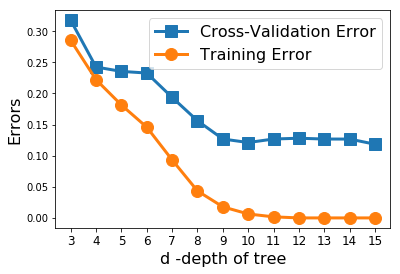

In [146]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from statistics import mean
d_values = np.arange(3, 16, dtype='int')
cv_trnErr = dict()
cvErr = dict()
dtcv_models = dict()
dtcv_meancvErr=dict()
dtcv_meantrnErr=dict()
for d in d_values:
    dtcv_models[d] = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    dtcv_models[d].fit(X_trn,y_trn)
    temp = cross_validate(DecisionTreeClassifier(criterion='entropy',max_depth=d),X_trn, y_trn, cv=10,return_train_score=True)
    cv_trnErr[d]=temp['train_score']
    #print(cv_trnErr[d])
    cvErr[d]= temp['test_score']
    #print(cvErr[d])
    dtcv_meancvErr[d] = 1- mean(cvErr[d])
    dtcv_meantrnErr[d]= 1- mean(cv_trnErr[d])

#print(dtcv_meancvErr)
plt.figure()
plt.plot(dtcv_meancvErr.keys(), dtcv_meancvErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(dtcv_meantrnErr.keys(), dtcv_meantrnErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('d -depth of tree', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.xticks(list(cv_trnErr.keys()), fontsize=12)
plt.legend(['Cross-Validation Error','Training Error'], fontsize=16)

#means = [mean(cvErr[d]) for d in d_values]
dtcv_minvalerr = min(dtcv_meancvErr.values())
for d in d_values:
    if dtcv_meancvErr[d]== dtcv_minvalerr:
        d_best = d
print('\n','The value of d for which lowest cross-validation error of',dtcv_minvalerr,' was recoded, is d = ',d_best,'and the corresponding model has accuracy',100*dtcv_models[d_best].score(X_tst,y_tst),'%')

---
### **b**. Model Visualization (5 points)
We can use [GraphViz](https://www.graphviz.org/) to visualize a decision trees. Train a decision tree corresponding to $d = 5$ and then visualize it using the code below. 

In [134]:
#
# After you install GraphViz, EDIT THE CODE BELOW TO set the path to the 
# executable 'dot.exe' below (shown for Windows). On MacOs, you can find GraphViz 
# in the /Applications/ folder.
#
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/WinGraphviz'

#
# DO NOT EDIT CODE BELOW
#
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

export_graphviz(dtcv_models[4], out_file='tree.dot', feature_names=feature_names,
                class_names = ['loss', 'win'],
                rounded=True, proportion=False, precision=2, filled=True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])
Image(filename='tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

---
### **c**. Discussion (5 points)
Identify a **leaf node** in the tree that corresponds to a win (for 'x') with high confidence (that is, low entropy) and with a high number of samples. Draw the board game state (a 3 x 3 grid) that corresponds to this leaf node by analyzing all the conditions from the root of the tree to your chosen leaf node. Note that the features have been pre-processed as follows 0=blank, 1='o' and 2='x'. We also assume that 'x' goes first in all games. 

---
# 3. <font color='#556b2f'> **Text Categorization with Naive Bayes and Logistic Regression**</font>, 40 points. 

For this problem, we will see how to use some advanced features of scikit-learn such as data modeling pipelines as well as exploring other model evaluation metrics beyond accuracy. The task we'll consider is text categorization.

**The 20 newsgroups** [data set](http://qwone.com/~jason/20Newsgroups/) is a text data set that contains around 18k posts on 20 topics split into two subsets: training and testing. The split between the train and test set is based upon a messages posted before and after a specific date. This data set can be 'fetched' through [scikit directly](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html); check out the documentation for more details about the data set and the categories of text it contains.

We consider a simpler binary classification task of discriminating whether a specific article/post is about **baseball** or **hockey**. The code below loads and visualizes the data est for this task.

In [135]:
#
# DO NOT EDIT THE CODE BELOW
#

# Load the 20 Newsgroups data
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = ['rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
X_trn = train.data
y_trn = train.target
X_tst = test.data
y_tst = test.target

# The objects 'train' and 'test' above are dictionaries which contain the data, numeric labels, label names and
# other descriptors of the data set. Many scikit data loading functions return similar dictionaries of data.

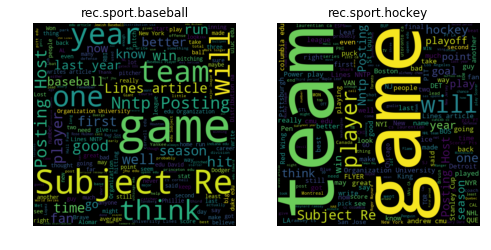

In [136]:
# Visualize the 20 Newsgroups data

# Install the package wordcloud, either by uncommenting the lines 
# below (ONE TIME) or using pip from your command line or using your
# preferred install method
#import sys
#!{sys.executable} -m pip install wordcloud

#
# DO NOT EDIT THE CODE BELOW
#
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 16.0))
for s in [0, 1]: 
    subset = [X_trn[i] for i in range(len(y_trn)) if y_trn[i] == s]
    subset_words = ' '.join(subset)
    cloud = WordCloud(width=512, height=512).generate(subset_words);
    
    ax = axes[s]
    ax.imshow(cloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(train.target_names[s])

---
### **a**. Setting up Learning Pipelines
Using scikit, we can chain several different pre-processing, training and model selection steps into a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). In this exercise, we will set up two simple pipelines, one for Naive Bayes and one for Logistic Regression. The pipeline we setup is pretty [standard](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) for many text processing applications and contains the following stages:
* A **tokenizer** pre-processes the text strings into a count-based vector representation such as [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model), and includes additional functionality to remove stop words (common words with little discriminative capacity), generate secondary features such as [n-grams](https://en.wikipedia.org/wiki/N-gram) etc.;
* A **transformer** is a second-stage of pre-processing that typically rescales the word-document counts from the previous step. For text, a good transform is the [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (term frequency/inverse document frequency), which ensures that documents are represented somewhat similarly irrespective of their size. This is similar to min-max normalization or 0-mean, 1-std standardization;
* A **classifier** can be any binary or multi-class classifier to solve the underlying text problem.


In [137]:
#
# DO NOT EDIT THE CODE BELOW.
#
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline for text categorization with Multinomial Naive Bayes
NBpipeline = Pipeline([('vectorizer', CountVectorizer()),
                       ('transformer', TfidfTransformer()),
                       ('classifier', MultinomialNB())])

# Pipeline for text categorization with LogisticRegression using default settings
LRpipeline = Pipeline([('vectorizer', CountVectorizer()),
                       ('transformer', TfidfTransformer()),
                       ('classifier', LogisticRegression(solver='lbfgs'))])

---
### **b**. Modeling and Evaluation (15 points) 
Train both the naive Bayes and logistic regression models using the training data. Generate a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for both models. _Note that there is no need to perform model selection for this part as we are considering the Naive Bayes and Logistic Regression with their default parameters. You can train a single model directly on the training data and evaluate it on the test data._

In [138]:
from sklearn.metrics import classification_report
#categories = ['rec.sport.baseball', 'rec.sport.hockey']
 
NBpipeline.fit(X_trn, y_trn)
LRpipeline.fit(X_trn, y_trn) 

# Evaluating/validation and testing can similarly be executed through
print('Naive Bayes classification report')
print(classification_report(y_tst, NBpipeline.predict(X_tst), target_names=categories))
print('Logistic Regression classification report')
print(classification_report(y_tst, LRpipeline.predict(X_tst), target_names=categories))

Naive Bayes classification report
                    precision    recall  f1-score   support

rec.sport.baseball       0.99      0.94      0.96       397
  rec.sport.hockey       0.94      0.99      0.97       399

         micro avg       0.96      0.96      0.96       796
         macro avg       0.97      0.96      0.96       796
      weighted avg       0.97      0.96      0.96       796

Logistic Regression classification report
                    precision    recall  f1-score   support

rec.sport.baseball       0.95      0.96      0.95       397
  rec.sport.hockey       0.96      0.95      0.95       399

         micro avg       0.95      0.95      0.95       796
         macro avg       0.95      0.95      0.95       796
      weighted avg       0.95      0.95      0.95       796



---
### **c**. ROC Curves and Area under the ROC Curve (20 points) 
Generate and [plot the ROC curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) for both models. What is the [AUC-ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) (area under the ROC curve) for both classifiers? _Note that to plot ROC curves, you will need a probability of prediction. Both Naive Bayes and Logistic Regression can return a probability of prediction through predict_proba(), while the function predict() will directly return the final prediction.

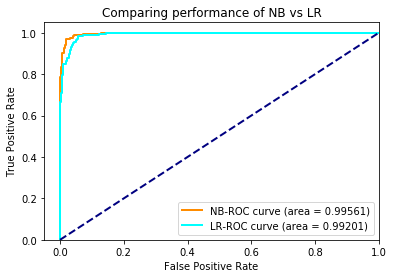

In [139]:
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score,auc
LR_auroc=roc_auc_score(y_tst,LRpipeline.predict_proba(X_tst)[:,1])
NB_auroc=roc_auc_score(y_tst,NBpipeline.predict_proba(X_tst)[:,1])

LR_fpr = dict()
LR_tpr = dict()
NB_tpr = dict()
NB_roc_auc = dict()
LR_roc_auc = dict()
LR_pp=LRpipeline.predict_proba(X_tst)[:,1]
NB_pp=NBpipeline.predict_proba(X_tst)[:,1]
#LR_fpr['rec.sport.baseball'], LR_tpr['rec.sport.baseball'], _ = roc_curve(y_tst, LRpipeline.predict_proba(X_tst))
#LR_roc_auc['rec.sport.baseball'] = auc(fpr['rec.sport.baseball'], tpr['rec.sport.baseball'])
LR_fpr['rec.sport.hockey'], LR_tpr['rec.sport.hockey'],thresholds = roc_curve(y_tst, LR_pp)
LR_roc_auc['rec.sport.hockey'] = auc(LR_fpr['rec.sport.hockey'], LR_tpr['rec.sport.hockey'])
NB_fpr['rec.sport.hockey'], NB_tpr['rec.sport.hockey'],thresholds = roc_curve(y_tst, NB_pp)
NB_roc_auc['rec.sport.hockey'] = auc(NB_fpr['rec.sport.hockey'], NB_tpr['rec.sport.hockey'])
#print('Logistic regression',LR_auroc,LR_roc_auc['rec.sport.hockey'])
#print('Naive Bayes',NB_auroc,NB_roc_auc['rec.sport.hockey'])

#The following plotting script was taken from the scikitlearn's ROC documentation
plt.figure()
lw = 2
plt.plot(NB_fpr['rec.sport.hockey'],NB_tpr['rec.sport.hockey'], color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.5f)' % NB_roc_auc['rec.sport.hockey'])
plt.plot(LR_fpr['rec.sport.hockey'],LR_tpr['rec.sport.hockey'], color='aqua',
         lw=lw, label='LR-ROC curve (area = %0.5f)' % LR_roc_auc['rec.sport.hockey'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing performance of NB vs LR')
plt.legend(loc="lower right")
plt.show()


---
### **d**. Discussion (5 points) 
What is the difference between the modeling assumptions of Naive Bayes and Logistic Regression? How does the naive assumption of Naive Bayes affect its classification ability for this text categorization task?

---